<a href="https://colab.research.google.com/github/NustinJewman/PythonFFB/blob/main/data_munging_notes_pt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/74b84c5fb2371b954b52b4f67ae5220930d57861/fantasypros/fp_projections.csv')

In [2]:
rb_df = df.loc[df['Pos'] == 'RB']

rb_df.sort_values(by='ReceivingYds', ascending=False).head(10)

,Unnamed: 0,Player,Team,Pos,Receptions,ReceivingYds,ReceivingTD,FL,RushingAtt,RushingYds,...,FieldGoalsAttempted,ExtraPointsMade,TotalSacks,TotalInt,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,FantasyPoints
12,0,Christian McCaffrey,CAR,RB,102.8,855.8,4.5,2.2,252.7,1130.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,272.2
43,13,Austin Ekeler,LAC,RB,66.4,671.7,4.2,1.3,164.3,709.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,186.3
33,5,Alvin Kamara,NO,RB,83.0,600.6,2.8,1.7,201.4,920.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,213.3
23,1,Saquon Barkley,NYG,RB,66.2,536.9,2.7,1.5,271.2,1237.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,244.6
156,35,James White,NE,RB,61.3,526.7,3.8,0.5,53.2,213.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.6
30,4,Dalvin Cook,MIN,RB,58.1,519.8,1.9,2.7,262.7,1151.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,231.9
162,37,Tarik Cohen,CHI,RB,66.7,481.0,2.7,1.4,85.0,316.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,104.3
25,2,Ezekiel Elliott,DAL,RB,59.3,468.6,2.6,2.6,288.0,1261.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,240.3
38,9,Miles Sanders,PHI,RB,51.7,462.6,2.4,2.1,234.7,1050.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,197.5
35,6,Clyde Edwards-Helaire,KC,RB,51.0,455.1,3.1,2.2,211.2,943.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.1


In [5]:
import seaborn as sns


In [3]:
adp_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/fantasypros/adp/PPR_ADP.csv', index_col=0)


In [4]:
adp_df.head(10)

,PLAYER,POS,AVG
0,Christian McCaffrey,RB,1.0
1,Saquon Barkley,RB,2.0
2,Ezekiel Elliott,RB,3.5
3,Michael Thomas,WR,4.0
4,Dalvin Cook,RB,5.0
5,Alvin Kamara,RB,5.5
6,Derrick Henry,RB,7.5
7,Davante Adams,WR,9.5
8,Joe Mixon,RB,10.0
10,Austin Ekeler,RB,12.0


In [6]:
adp_df['ADP_RANK'] = adp_df['AVG'].rank()
adp_df.head(5)

,PLAYER,POS,AVG,ADP_RANK
0,Christian McCaffrey,RB,1.0,1.0
1,Saquon Barkley,RB,2.0,2.0
2,Ezekiel Elliott,RB,3.5,3.0
3,Michael Thomas,WR,4.0,4.0
4,Dalvin Cook,RB,5.0,5.0


In [7]:
adp_df_cutoff = adp_df[:100] #limited to 100 rows. not the bums like trent taylor
adp_df_cutoff.shape

(100, 4)

In [8]:
replacement_players = {
    'RB': '',
    'WR': '',
    'QB': '',
    'TE': '',
}

for _, row in adp_df_cutoff.iterrows():
  position = row['POS']
  player = row['PLAYER']

  if position in replacement_players:
    replacement_players[position] = player

In [14]:
replacement_players

{'RB': 'Latavius Murray',
 'WR': 'Jamison Crowder',
 'QB': 'Aaron Rodgers',
 'TE': 'Rob Gronkowski'}

In [10]:
df = df[['Player', 'Pos', 'Team', 'FantasyPoints']]  #this is how to filter out columns in pandas. set new df original to df and columns you wish to keep in new df.
df.head()

,Player,Pos,Team,FantasyPoints
0,Lamar Jackson,QB,BAL,361.1
1,Patrick Mahomes,QB,KC,345.1
2,Dak Prescott,QB,DAL,318.5
3,Deshaun Watson,QB,HOU,312.7
4,Russell Wilson,QB,SEA,308.5


In [11]:
replacement_values = {}

for position, player_name in replacement_players.items():
  player = df.loc[df['Player'] == player_name]
  replacement_values[position] = player['FantasyPoints'].tolist()[0]

In [15]:
replacement_values

{'RB': 97.4, 'WR': 118.9, 'QB': 277.3, 'TE': 92.3}

In [16]:

scoring_weights = {
    'receptions': 1, # PPR
    'receiving_yds': 0.1,
    'receiving_td': 6,
    'FL': -2, #fumbles lost
    'rushing_yds': 0.1,
    'rushing_td': 6,
    'passing_yds': 0.04,
    'passing_td': 4,
    'int': -2
}
df['FantasyPoints'] = (
    df['Receptions']*scoring_weights['receptions'] + df['ReceivingYds']*scoring_weights['receiving_yds'] + \
    df['ReceivingTD']*scoring_weights['receiving_td'] + df['FL']*scoring_weights['FL'] + \
    df['RushingYds']*scoring_weights['rushing_yds'] + df['RushingTD']*scoring_weights['rushing_td'] + \
    df['PassingYds']*scoring_weights['passing_yds'] + df['PassingTD']*scoring_weights['passing_td'] + \
    df['Int']*scoring_weights['int'] )

KeyError: ignored

In [17]:
pd.set_option('chained_assignment', None)

df = df.loc[df['Pos'].isin(['QB', 'RB', 'WR', 'TE'])]

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df['VOR'] = df.apply(
    lambda row: row['FantasyPoints'] - replacement_values.get(row['Pos']), axis=1)

In [ ]:
df.head()

,Player,Pos,Team,FantasyPoints,VOR
0,Lamar Jackson,QB,BAL,361.1,83.8
1,Patrick Mahomes,QB,KC,345.1,67.8
2,Dak Prescott,QB,DAL,318.5,41.2
3,Deshaun Watson,QB,HOU,312.7,35.4
4,Russell Wilson,QB,SEA,308.5,31.2


In [26]:
pd.set_option('display.max_rows', None)
df.sort_values(by='VOR',ascending=False).head(10)

,Player,Pos,Team,FantasyPoints,VOR
12,Christian McCaffrey,RB,CAR,272.2,1.000000
23,Saquon Barkley,RB,NYG,244.6,0.938952
25,Ezekiel Elliott,RB,DAL,240.3,0.929440
26,Derrick Henry,RB,TEN,239.9,0.928556
30,Dalvin Cook,RB,MIN,231.9,0.910860
33,Alvin Kamara,RB,NO,213.3,0.869719
35,Clyde Edwards-Helaire,RB,KC,203.1,0.847158
36,Joe Mixon,RB,CIN,201.6,0.843840
37,Nick Chubb,RB,CLE,200.0,0.840301
38,Miles Sanders,RB,PHI,197.5,0.834771


In [27]:
df.groupby('Pos')['VOR'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
QB,89.0,0.222728,0.271520,0.000000,0.010617,0.026543,0.539704,0.798717
RB,155.0,0.541322,0.147736,0.399469,0.422362,0.481752,0.623756,1.000000
TE,128.0,0.487392,0.075257,0.409202,0.432869,0.457421,0.528534,0.765539
WR,245.0,0.462407,0.115075,0.350365,0.366291,0.409865,0.548109,0.804247


In [24]:
df['VOR'] = df['VOR'].apply(lambda x: (x-df['VOR'].min()) / (df['VOR'].max() - df['VOR'].min()))
# or
# min_vor = df['VOR'].min()
# max_vor = df['VOR'].max()
# vor_range = max_vor - min_vor
# df['VOR'] = df['VOR'].apply(lambda x: (x-min_vor) / vor_range

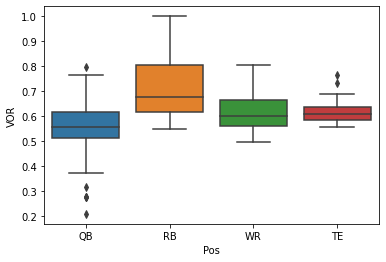

In [37]:
import seaborn as sns
num_teams = 12
num_spots = 16 # 1 QB, 2RB, 2WR, 1TE, 1FLEX, 1K, 1DST, 7 BENCH
draft_pool = num_teams * num_spots

df_copy = df[:draft_pool]

sns.boxplot(x=df_copy['Pos'], y=df_copy['VOR']);